In [1]:
! pip install tensorflow

     -------------------------------------- 276.6/276.6 MB 1.0 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 8.0 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.7/2.7 MB 7.3 MB/s eta 0:00:00
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
     ---------------------------------------- 14.8/14.8 MB 5.7 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     ---------------------------------------- 4.3/4.3 MB 5.0 MB/s eta 0:00:00
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import tensorflow as tf

mnist = tf.keras.datasets   # mnist is a dataset of 28x28 images of handwritten digits and their labels 

(x_train, y_train), (x_test, y_test) = mnist.mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # a simple fully-connected layer, 128 units, softmax activation


model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2578 - accuracy: 0.9255
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1037 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0712 - accuracy: 0.9778


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model   

print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1051 - accuracy: 0.9663
0.10508763790130615 0.9663000106811523


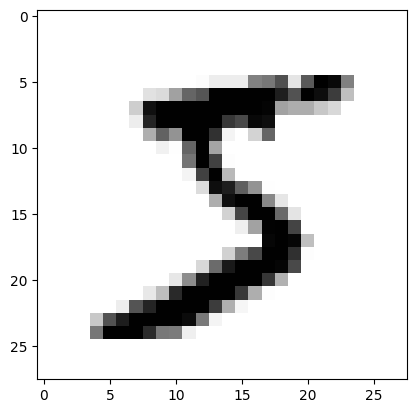

In [6]:
import matplotlib.pyplot as plt

#print(x_train[0])  # print how the data looks like

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
model.save('epic_num_reader.model')  # saving the model

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [10]:
new_model = tf.keras.models.load_model('epic_num_reader.model')  # loading the model

In [11]:
predictions = new_model([x_test]) #Predict always takes a list

In [12]:
print(predictions)

tf.Tensor(
[[4.65399441e-10 5.99663394e-08 3.16448859e-06 ... 9.99994040e-01
  1.22370691e-08 2.76683743e-09]
 [1.20928059e-08 2.48730590e-04 9.99714553e-01 ... 5.13981249e-08
  1.05778909e-05 5.44918666e-10]
 [6.55418688e-08 9.98208880e-01 2.11551778e-05 ... 5.28150646e-04
  1.15838263e-03 1.49753589e-06]
 ...
 [2.00753036e-09 4.68745839e-07 7.38098933e-08 ... 1.63967579e-05
  3.31586743e-05 8.09083758e-06]
 [1.60155853e-08 2.40954030e-08 1.40747761e-10 ... 1.18693775e-08
  2.13002786e-05 1.94675409e-09]
 [9.07058961e-08 1.49832751e-08 1.23755342e-07 ... 2.12316387e-09
  1.10646603e-07 1.27654567e-10]], shape=(10000, 10), dtype=float32)


In [13]:
import numpy as np

print(np.argmax(predictions[0]))  # print our model's prediction

7


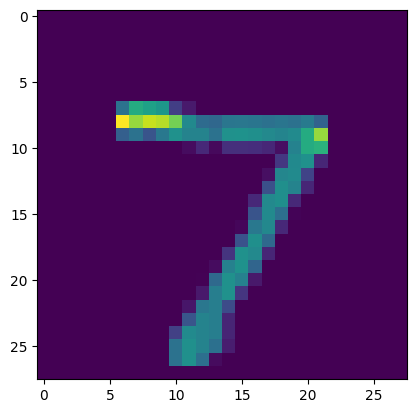

In [14]:
plt.imshow(x_test[0])
plt.show()